In [1]:
# Load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plot_utils import *
from sklearn.metrics import cohen_kappa_score
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
# Read dataframe. Remove annotations that were marked as 'test' or not done by annotators. 
base = pd.read_csv('prepared data/base.csv') # Load data
annotations = pd.read_csv('prepared data/annotations.csv') # Load data
questions = pd.read_csv('prepared data/questions.csv') # Load data
questions_wide = pd.read_csv('prepared data/questions_wide.csv') # Load data

# Study statistics

In [3]:
base[['evaluated_letter','medical_specialty']].value_counts(normalize=True)

evaluated_letter  medical_specialty
GPT letter        cardiology2          0.234375
ORG letter        cardiology2          0.234375
GPT letter        NICU                 0.145833
ORG letter        NICU                 0.145833
GPT letter        ICU                  0.119792
ORG letter        ICU                  0.119792
dtype: float64

# USABILITY

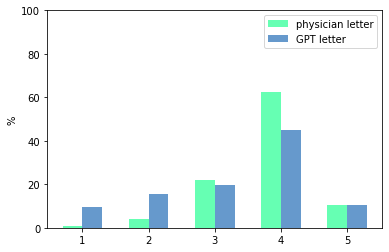

In [4]:
# Plot usability barplot for GPT and physician letter separately
make_barplot(group_indices={'physician letter':base.evaluated_letter=='ORG letter','GPT letter':base.evaluated_letter=='GPT letter'}, 
    data=base, outcome='usability_likert', shift=np.array([-1,1]),
    save_name='usability_barplot.pdf')

In [5]:
# Calculate average usability
print('mean physician letter score',round(np.mean(base.loc[base.evaluated_letter=='ORG letter','usability_likert']),1),
      '(',
      round(np.std(base.loc[base.evaluated_letter=='ORG letter','usability_likert']),1),
      ')')

print('mean GPT letter score',round(np.mean(base.loc[base.evaluated_letter=='GPT letter','usability_likert']),1),
      '(',
      round(np.std(base.loc[base.evaluated_letter=='GPT letter','usability_likert']),1),
      ')')

mean physician letter score 3.8 ( 0.7 )
mean GPT letter score 3.3 ( 1.1 )


In [6]:
# Calculate average usability
print('mean ICU physician letter score',round(np.mean(base.loc[(base.evaluated_letter=='ORG letter') & (base.medical_specialty=='ICU'),'usability_likert']),1),
      '(',
      round(np.std(base.loc[(base.evaluated_letter=='ORG letter') & (base.medical_specialty=='ICU'),'usability_likert']),1),
      ')')

print('mean ICU GPT letter score',round(np.mean(base.loc[(base.evaluated_letter=='GPT letter') & (base.medical_specialty=='ICU'),'usability_likert']),1),
      '(',
      round(np.std(base.loc[(base.evaluated_letter=='GPT letter') & (base.medical_specialty=='ICU'),'usability_likert']),1),
      ')')

# Calculate average usability
print('mean NICU physician letter score',round(np.mean(base.loc[(base.evaluated_letter=='ORG letter') & (base.medical_specialty=='NICU'),'usability_likert']),1),
      '(',
      round(np.std(base.loc[(base.evaluated_letter=='ORG letter') & (base.medical_specialty=='NICU'),'usability_likert']),1),
      ')')

print('mean NICU GPT letter score',round(np.mean(base.loc[(base.evaluated_letter=='GPT letter') & (base.medical_specialty=='NICU'),'usability_likert']),1),
      '(',
      round(np.std(base.loc[(base.evaluated_letter=='GPT letter') & (base.medical_specialty=='NICU'),'usability_likert']),1),
      ')')

# Calculate average usability
print('mean cardiology physician letter score',round(np.mean(base.loc[(base.evaluated_letter=='ORG letter') & (base.medical_specialty=='cardiology2'),'usability_likert']),1),
      '(',
      round(np.std(base.loc[(base.evaluated_letter=='ORG letter') & (base.medical_specialty=='cardiology2'),'usability_likert']),1),
      ')')

print('mean cardiology GPT letter score',round(np.mean(base.loc[(base.evaluated_letter=='GPT letter') & (base.medical_specialty=='cardiology2'),'usability_likert']),1),
      '(',
      round(np.std(base.loc[(base.evaluated_letter=='GPT letter') & (base.medical_specialty=='cardiology2'),'usability_likert']),1),
      ')')

mean ICU physician letter score 3.6 ( 0.6 )
mean ICU GPT letter score 3.3 ( 1.2 )
mean NICU physician letter score 3.7 ( 0.9 )
mean NICU GPT letter score 3.8 ( 0.7 )
mean cardiology physician letter score 3.9 ( 0.6 )
mean cardiology GPT letter score 3.0 ( 1.2 )


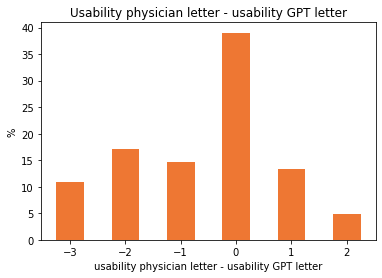

In [7]:
# Calculate differences in usability
double_evaluation_index = pd.crosstab(base.patientid, base.evaluated_letter).loc[pd.crosstab(base.patientid, base.evaluated_letter).sum(axis=1)==2,:].index
double_evaluation_base = base.loc[base.patientid.isin(double_evaluation_index),:]
double_evaluation_base_GPT = double_evaluation_base.loc[double_evaluation_base.evaluated_letter=='GPT letter',['patientid','usability_likert']].rename(columns={'usability_likert':'usability_likert_GPT'})
double_evaluation_base_ORG = double_evaluation_base.loc[double_evaluation_base.evaluated_letter=='ORG letter',['patientid','usability_likert']].rename(columns={'usability_likert':'usability_likert_ORG'})
double_usability = double_evaluation_base_GPT.merge(double_evaluation_base_ORG, on='patientid')
double_usability['usability_difference'] = double_usability['usability_likert_GPT'] - double_usability['usability_likert_ORG']

# Plot differences in usability
barplot_table_difference = double_usability['usability_difference'].value_counts()
width = 0.5
plt.bar(x=barplot_table_difference.keys(), height=100*barplot_table_difference/barplot_table_difference.sum(), width=width, color='#EE7733')
plt.ylabel('%')
plt.xlabel('usability physician letter - usability GPT letter')
plt.title('Usability physician letter - usability GPT letter')
plt.savefig('figures/usability_difference_barplot.png', bbox_inches='tight')
plt.show()

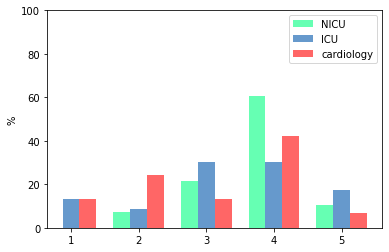

In [9]:
# Plot usability barplot for GPT letter across medical specialties
make_barplot(group_indices={'NICU':base.medical_specialty=='NICU','ICU':base.medical_specialty=='ICU','cardiology':base.medical_specialty=='cardiology2'}, #'cardiology':base.medical_specialty=='cardiology' 
    data=base.loc[base.evaluated_letter=='GPT letter',:], outcome='usability_likert', shift=np.array([-1,0,1]), 
    save_name='usability_barplot_per_specialty_GPT.png')

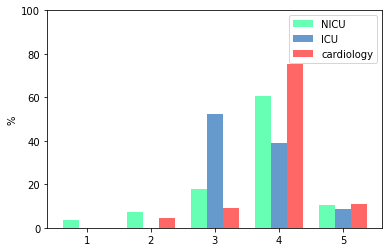

In [10]:
# Plot usability barplot for physician letter across medical specialties
make_barplot(group_indices={'NICU':base.medical_specialty=='NICU','ICU':base.medical_specialty=='ICU','cardiology':base.medical_specialty=='cardiology2'}, #'cardiology':base.medical_specialty=='cardiology' 
    data=base.loc[base.evaluated_letter=='ORG letter',:], outcome='usability_likert', shift=np.array([-1,0,1]), 
    save_name='usability_barplot_per_specialty_ORG.png')

# QUALITATIVE QUESTIONS

In [12]:
pd.crosstab(questions.question, questions.answer, margins=True)[['ORG letter','GPT letter']]

answer,ORG letter,GPT letter
question,,
Vraag 1,56,40
Vraag 2,74,22
Vraag 3,64,32
All,194,94


In [13]:
round(100*pd.crosstab(questions.question, questions.answer, margins=True, normalize='index')[['ORG letter','GPT letter']],0)

answer,ORG letter,GPT letter
question,,
Vraag 1,58.0,42.0
Vraag 2,77.0,23.0
Vraag 3,67.0,33.0
All,67.0,33.0


In [14]:
# questions per medical specialty
pd.crosstab(questions.loc[questions.medical_specialty=='cardiology2','question'], 
    questions.loc[questions.medical_specialty=='cardiology2','answer'], margins=True)[['ORG letter','GPT letter']]

answer,ORG letter,GPT letter
question,,
Vraag 1,34,11
Vraag 2,40,5
Vraag 3,40,5
All,114,21


In [15]:
# questions per medical specialty
round(100*pd.crosstab(questions.loc[questions.medical_specialty=='cardiology2','question'], 
    questions.loc[questions.medical_specialty=='cardiology2','answer'], margins=True, normalize='index')[['ORG letter','GPT letter']],0)

answer,ORG letter,GPT letter
question,,
Vraag 1,76.0,24.0
Vraag 2,89.0,11.0
Vraag 3,89.0,11.0
All,84.0,16.0


# Omissions/hallucinations

In [17]:
crosstab = pd.crosstab(annotations.evaluated_letter, annotations.importance, margins=True, normalize='index')
crosstab = crosstab.loc[:,['False','Less important','Important']]
crosstab.loc[['ORG letter','GPT letter','All'],:]

importance,False,Less important,Important
evaluated_letter,,,
ORG letter,0.343158,0.444211,0.212632
GPT letter,0.163265,0.215561,0.621173
All,0.231136,0.301827,0.467037


In [18]:
# Physician letter
annotations_physician = annotations.loc[(annotations.evaluated_letter=='ORG letter')&(annotations.importance!='False'),:]
crosstab = pd.crosstab(annotations_physician['type'],annotations_physician['importance'], margins=True) 
crosstab.loc[['omission','trivial','hallucination','All'],['Less important','Important','All']]

importance,Less important,Important,All
type,,,
omission,53,59,112
trivial,1,0,1
hallucination,157,42,199
All,211,101,312


In [19]:
# Physician letter
crosstab = round(100*pd.crosstab(annotations_physician['type'],annotations_physician['importance'], margins=True, normalize='columns'),0)
crosstab.loc[['omission','trivial','hallucination'],['Less important','Important','All']]
# crosstab.loc[['omission','trivial','hallucination','All'],['Less important','Important']]

importance,Less important,Important,All
type,,,
omission,25.0,58.0,36.0
trivial,0.0,0.0,0.0
hallucination,74.0,42.0,64.0


In [20]:
# GPT letter
annotations_GPT = annotations.loc[(annotations.evaluated_letter=='GPT letter')&(annotations.importance!='False'),:]
crosstab = pd.crosstab(annotations_GPT['type'],annotations_GPT['importance'], margins=True, ) 
crosstab.loc[['omission','trivial','hallucination','All'],['Less important','Important','All']]

importance,Less important,Important,All
type,,,
omission,92,267,359
trivial,57,152,209
hallucination,20,68,88
All,169,487,656


In [21]:
# GPT letter
crosstab = round(100*pd.crosstab(annotations_GPT['type'],annotations_GPT['importance'], margins=True, normalize='columns'),0)
crosstab.loc[['omission','trivial','hallucination'],['Less important','Important','All']]
# crosstab.loc[['omission','trivial','hallucination','All'],['Less important','Important']]

importance,Less important,Important,All
type,,,
omission,54.0,55.0,55.0
trivial,34.0,31.0,32.0
hallucination,12.0,14.0,13.0


In [67]:
# Calculate the statistics at the letter level 
# Get omissions, trivial facts, hallucinations at the individual letter level
annotations_per_letter_minor_severe = get_number_of_annotations_per_letter(annotations.loc[(annotations.importance!='False'),:], base)
annotations_per_letter_severe = get_number_of_annotations_per_letter(annotations.loc[(annotations.importance=='Important'),:], base)

get_statistics_per_letter(annotations_per_letter=annotations_per_letter_minor_severe.loc[annotations_per_letter_minor_severe.medical_specialty=='cardiology2',:], 
                          letter_type='ORG letter', type_annotations=['omission','trivial','hallucination'])

,mean,std,median,25percentile,75percentile,min,max
omission,0.9,1.1,0.0,0.0,2.0,0.0,5.0
trivial,0.0,0.0,0.0,0.0,0.0,0.0,0.0
hallucination,2.4,3.0,1.0,0.0,3.0,0.0,16.0


In [68]:
get_statistics_per_letter(annotations_per_letter=annotations_per_letter_severe.loc[annotations_per_letter_severe.medical_specialty=='cardiology2',:],
                          letter_type='ORG letter', type_annotations=['omission','trivial','hallucination'])

,mean,std,median,25percentile,75percentile,min,max
omission,0.5,1.0,0.0,0.0,1.0,0.0,5.0
trivial,0.0,0.0,0.0,0.0,0.0,0.0,0.0
hallucination,0.2,0.6,0.0,0.0,0.0,0.0,3.0


In [69]:
get_statistics_per_letter(annotations_per_letter=annotations_per_letter_minor_severe.loc[annotations_per_letter_minor_severe.medical_specialty=='cardiology2',:],
                          letter_type='GPT letter', type_annotations=['omission','trivial','hallucination'])

,mean,std,median,25percentile,75percentile,min,max
omission,4.5,5.7,2.0,0.0,8.0,0.0,22.0
trivial,2.4,2.4,2.0,1.0,4.0,0.0,9.0
hallucination,0.9,1.7,1.0,0.0,1.0,0.0,11.0


In [70]:
get_statistics_per_letter(annotations_per_letter=annotations_per_letter_severe.loc[annotations_per_letter_severe.medical_specialty=='cardiology2',:], 
                          letter_type='GPT letter', type_annotations=['omission','trivial','hallucination'])

,mean,std,median,25percentile,75percentile,min,max
omission,4.0,5.6,1.0,0.0,6.0,0.0,22.0
trivial,2.1,2.2,1.0,0.0,3.0,0.0,9.0
hallucination,0.9,1.7,0.0,0.0,1.0,0.0,11.0


In [41]:
# How much percent of letters do omissions, trivial facts, and hallucinations/additions occur?
MS='ICU'

ORG_omission = annotations_per_letter_minor_severe.loc[
    (annotations_per_letter_minor_severe.variable=='omission') & 
    (annotations_per_letter_minor_severe.medical_specialty==MS) &
    (annotations_per_letter_minor_severe.evaluated_letter=='ORG letter'),:
]
ORG_trivial = annotations_per_letter_minor_severe.loc[
    (annotations_per_letter_minor_severe.variable=='trivial') & 
    (annotations_per_letter_minor_severe.medical_specialty==MS) &
    (annotations_per_letter_minor_severe.evaluated_letter=='ORG letter'),:
]
ORG_addition = annotations_per_letter_minor_severe.loc[
    (annotations_per_letter_minor_severe.variable=='hallucination') & 
    (annotations_per_letter_minor_severe.medical_specialty==MS) &
    (annotations_per_letter_minor_severe.evaluated_letter=='ORG letter'),:
]
print('physician letter omission', round(100*(ORG_omission.value>0).sum()/ORG_omission.shape[0]))
print('physician letter trivial fact', round(100*(ORG_trivial.value>0).sum()/ORG_trivial.shape[0]))
print('physician letter addition', round(100*(ORG_addition.value>0).sum()/ORG_addition.shape[0]))

physician letter omission 57
physician letter trivial fact 0
physician letter addition 57


In [42]:
# How much percent of letters do omissions, trivial facts, and hallucinations/additions occur?
ORG_omission = annotations_per_letter_severe.loc[
    (annotations_per_letter_severe.variable=='omission') & 
    (annotations_per_letter_severe.medical_specialty==MS) &
    (annotations_per_letter_severe.evaluated_letter=='ORG letter'),:
]
ORG_trivial = annotations_per_letter_severe.loc[
    (annotations_per_letter_severe.variable=='trivial') & 
    (annotations_per_letter_severe.medical_specialty==MS) &
    (annotations_per_letter_severe.evaluated_letter=='ORG letter'),:
]
ORG_addition = annotations_per_letter_severe.loc[
    (annotations_per_letter_severe.variable=='hallucination') & 
    (annotations_per_letter_severe.medical_specialty==MS) &
    (annotations_per_letter_severe.evaluated_letter=='ORG letter'),:
]
print('physician letter omission', round(100*(ORG_omission.value>0).sum()/ORG_omission.shape[0]))
print('physician letter trivial fact', round(100*(ORG_trivial.value>0).sum()/ORG_trivial.shape[0]))
print('physician letter addition', round(100*(ORG_addition.value>0).sum()/ORG_addition.shape[0]))

physician letter omission 35
physician letter trivial fact 0
physician letter addition 26


In [43]:
# How much percent of letters do omissions, trivial facts, and hallucinations/additions occur?
MS='ICU'

GPT_omission = annotations_per_letter_minor_severe.loc[
    (annotations_per_letter_minor_severe.variable=='omission') & 
    (annotations_per_letter_minor_severe.medical_specialty==MS) &
    (annotations_per_letter_minor_severe.evaluated_letter=='GPT letter'),:
]
GPT_trivial = annotations_per_letter_minor_severe.loc[
    (annotations_per_letter_minor_severe.variable=='trivial') & 
    (annotations_per_letter_minor_severe.medical_specialty==MS) &
    (annotations_per_letter_minor_severe.evaluated_letter=='GPT letter'),:
]
GPT_hallucination = annotations_per_letter_minor_severe.loc[
    (annotations_per_letter_minor_severe.variable=='hallucination') & 
    (annotations_per_letter_minor_severe.medical_specialty==MS) &
    (annotations_per_letter_minor_severe.evaluated_letter=='GPT letter'),:
]
print('GPT letter omission', round(100*(GPT_omission.value>0).sum()/GPT_omission.shape[0]))
print('GPT letter trivial fact', round(100*(GPT_trivial.value>0).sum()/GPT_trivial.shape[0]))
print('GPT letter hallucination', round(100*(GPT_hallucination.value>0).sum()/GPT_hallucination.shape[0]))

GPT letter omission 83
GPT letter trivial fact 70
GPT letter hallucination 43


In [44]:
# How much percent of letters do omissions, trivial facts, and hallucinations/additions occur?
GPT_omission = annotations_per_letter_severe.loc[
    (annotations_per_letter_severe.variable=='omission') & 
    (annotations_per_letter_severe.medical_specialty==MS) &
    (annotations_per_letter_severe.evaluated_letter=='GPT letter'),:
]
GPT_trivial = annotations_per_letter_severe.loc[
    (annotations_per_letter_severe.variable=='trivial') & 
    (annotations_per_letter_severe.medical_specialty==MS) &
    (annotations_per_letter_severe.evaluated_letter=='GPT letter'),:
]
GPT_hallucination = annotations_per_letter_severe.loc[
    (annotations_per_letter_severe.variable=='hallucination') & 
    (annotations_per_letter_severe.medical_specialty==MS) &
    (annotations_per_letter_severe.evaluated_letter=='GPT letter'),:
]
print('GPT letter omission', round(100*(GPT_omission.value>0).sum()/GPT_omission.shape[0]))
print('GPT letter trivial fact', round(100*(GPT_trivial.value>0).sum()/GPT_trivial.shape[0]))
print('GPT letter hallucination', round(100*(GPT_hallucination.value>0).sum()/GPT_hallucination.shape[0]))

GPT letter omission 52
GPT letter trivial fact 48
GPT letter hallucination 35


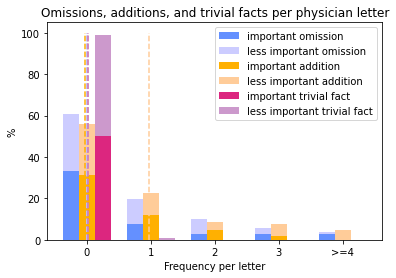

In [33]:
# Make plot of omissions/additions/trivial facts 
evaluated_letter = 'ORG letter'
medical_specialty = 'NICU'
annotations_per_letter_important = get_number_of_annotations_per_letter(annotations.loc[(annotations.importance=='Important'),:], base)
annotations_per_letter_important = annotations_per_letter_important.loc[
    # (annotations_per_letter_important.medical_specialty==medical_specialty) & 
    (annotations_per_letter_important.evaluated_letter==evaluated_letter)]
annotations_per_letter_less_important = get_number_of_annotations_per_letter(annotations.loc[(annotations.importance=='Less important'),:], base)
annotations_per_letter_less_important = annotations_per_letter_less_important.loc[
    # (annotations_per_letter_less_important.medical_specialty==medical_specialty) & 
    (annotations_per_letter_less_important.evaluated_letter==evaluated_letter)]

make_om_hal_triv_barplot_importance(
    group_indices = {
        'omission':['variable','omission'], 
        'addition':['variable','hallucination'], 
        'trivial fact':['variable','trivial']},
    data = {'important':annotations_per_letter_important, 'less important':annotations_per_letter_less_important},
    outcome = 'value',
    shift = np.array([-1,0,1]),
    title='Omissions, additions, and trivial facts per physician letter', 
    save_name='annotations_barplot_ORG.pdf',
    cutoff=3)

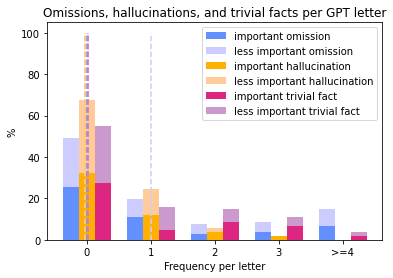

In [34]:
# Make plot of omissions/additions/trivial facts 
evaluated_letter = 'GPT letter'
medical_specialty = 'NICU'
annotations_per_letter_important = get_number_of_annotations_per_letter(annotations.loc[(annotations.importance=='Important'),:], base)
annotations_per_letter_important = annotations_per_letter_important.loc[
    # (annotations_per_letter_important.medical_specialty==medical_specialty) & 
    (annotations_per_letter_important.evaluated_letter==evaluated_letter)]
annotations_per_letter_less_important = get_number_of_annotations_per_letter(annotations.loc[(annotations.importance=='Less important'),:], base)
annotations_per_letter_less_important = annotations_per_letter_less_important.loc[
    # (annotations_per_letter_less_important.medical_specialty==medical_specialty) & 
    (annotations_per_letter_less_important.evaluated_letter==evaluated_letter)]

make_om_hal_triv_barplot_importance(
    group_indices = {
        'omission':['variable','omission'], 
        'hallucination':['variable','hallucination'], 
        'trivial fact':['variable','trivial']},
    data = {'important':annotations_per_letter_important, 'less important':annotations_per_letter_less_important},
    outcome = 'value',
    shift = np.array([-1,0,1]),
    title='Omissions, hallucinations, and trivial facts per GPT letter', 
    save_name='annotations_barplot_GPT.pdf',
    cutoff=3)

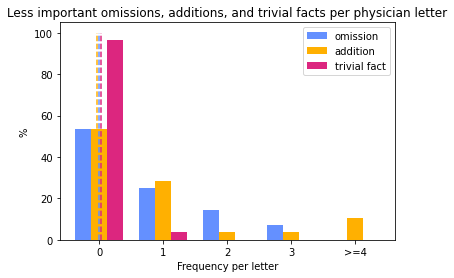

In [35]:
# Make plot of omissions/additions/trivial facts 
doc_approved_annotations = annotations.loc[(annotations.importance=='Less important'),:]
annotations_per_letter = get_number_of_annotations_per_letter(doc_approved_annotations, base)

# Plot usability barplot for physician letter across medical specialties
make_om_hal_triv_barplot(group_indices={
    'omission':annotations_per_letter.variable=='omission',
    'addition':annotations_per_letter.variable=='hallucination',
    'trivial fact':annotations_per_letter.variable=='trivial'}, 
    data=annotations_per_letter.loc[(annotations_per_letter.evaluated_letter=='ORG letter')
        & (annotations_per_letter.medical_specialty=='NICU'),:], # & (annotations_per_letter.medical_specialty=='cardiology')
    outcome='value', 
    shift=np.array([-1,0,1]),
    title='Less important omissions, additions, and trivial facts per physician letter', 
    save_name='annotations_barplot_ORG_LI_NICU.pdf',
    cutoff=3) 

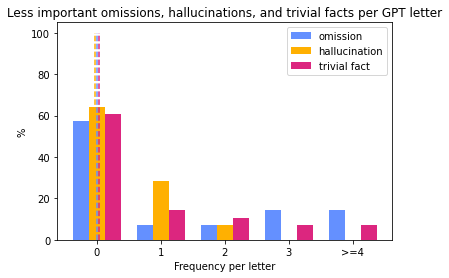

In [36]:
# Make plot of omissions/hallucinations/trivial facts 
doc_approved_annotations = annotations.loc[(annotations.importance=='Less important'),:]
annotations_per_letter = get_number_of_annotations_per_letter(doc_approved_annotations, base)

# Plot usability barplot for GPT letter across medical specialties
make_om_hal_triv_barplot(group_indices={
    'omission':annotations_per_letter.variable=='omission',
    'hallucination':annotations_per_letter.variable=='hallucination',
    'trivial fact':annotations_per_letter.variable=='trivial'}, 
    data=annotations_per_letter.loc[(annotations_per_letter.evaluated_letter=='GPT letter')
        & (annotations_per_letter.medical_specialty=='NICU'),:], # & (annotations_per_letter.medical_specialty=='cardiology')
    outcome='value', 
    shift=np.array([-1,0,1]),
    title='Less important omissions, hallucinations, and trivial facts per GPT letter', 
    save_name='annotations_barplot_GPT_LI_NICU.pdf',
    cutoff=3) 